# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [1]:
# PANDAS IS FOR DATA WRANGLING
import pandas as pd

# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGRESSOR MODEL
from sklearn.ensemble import RandomForestRegressor

# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [2]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-red.csv')

# DISPLAY THE FIRST 5 ROWS
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


# Inspect our data using `df.describe()` function.

In [3]:
# Inspect our data using `df.describe()` function.
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,4.010000,2.000000,14.900000,8.000000


# Check for Nulls.

In [4]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [5]:
# Check for Duplicates
df.duplicated().sum()

240

In [6]:
# Remove duplicates
print(df.shape)
# REMOVE DUPLICATES HERE
df = df.drop_duplicates()
# Sanity check
print(df.shape)

(1599, 11)
(1359, 11)


# Visualize our data to discover outliers.
* Use `sns.pariplot`

In [7]:
# Visualize our data to discover outliers.


___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [8]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
# Set the columns you want to remove outliers for
target_cols = ['total sulfur dioxide', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'pH',
       'sulphates', 'alcohol']

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it

    new_col_name = col + "_zscore"
    # Set the new column equal to the score

    df[new_col_name] = stats.stats.zscore(df[col])
    # Set the z-score to its absolute value of the for easier filtering

    df[new_col_name] = abs(df[new_col_name])
    # Append the new column name our our z_score_cols list for easier access for later.

    z_score_cols.append(new_col_name)

condition = df[z_score_cols] < 3 # remove up to 3 standard deviations
df.shape
# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (1359, 21)
After removal of outliers (1243, 21)


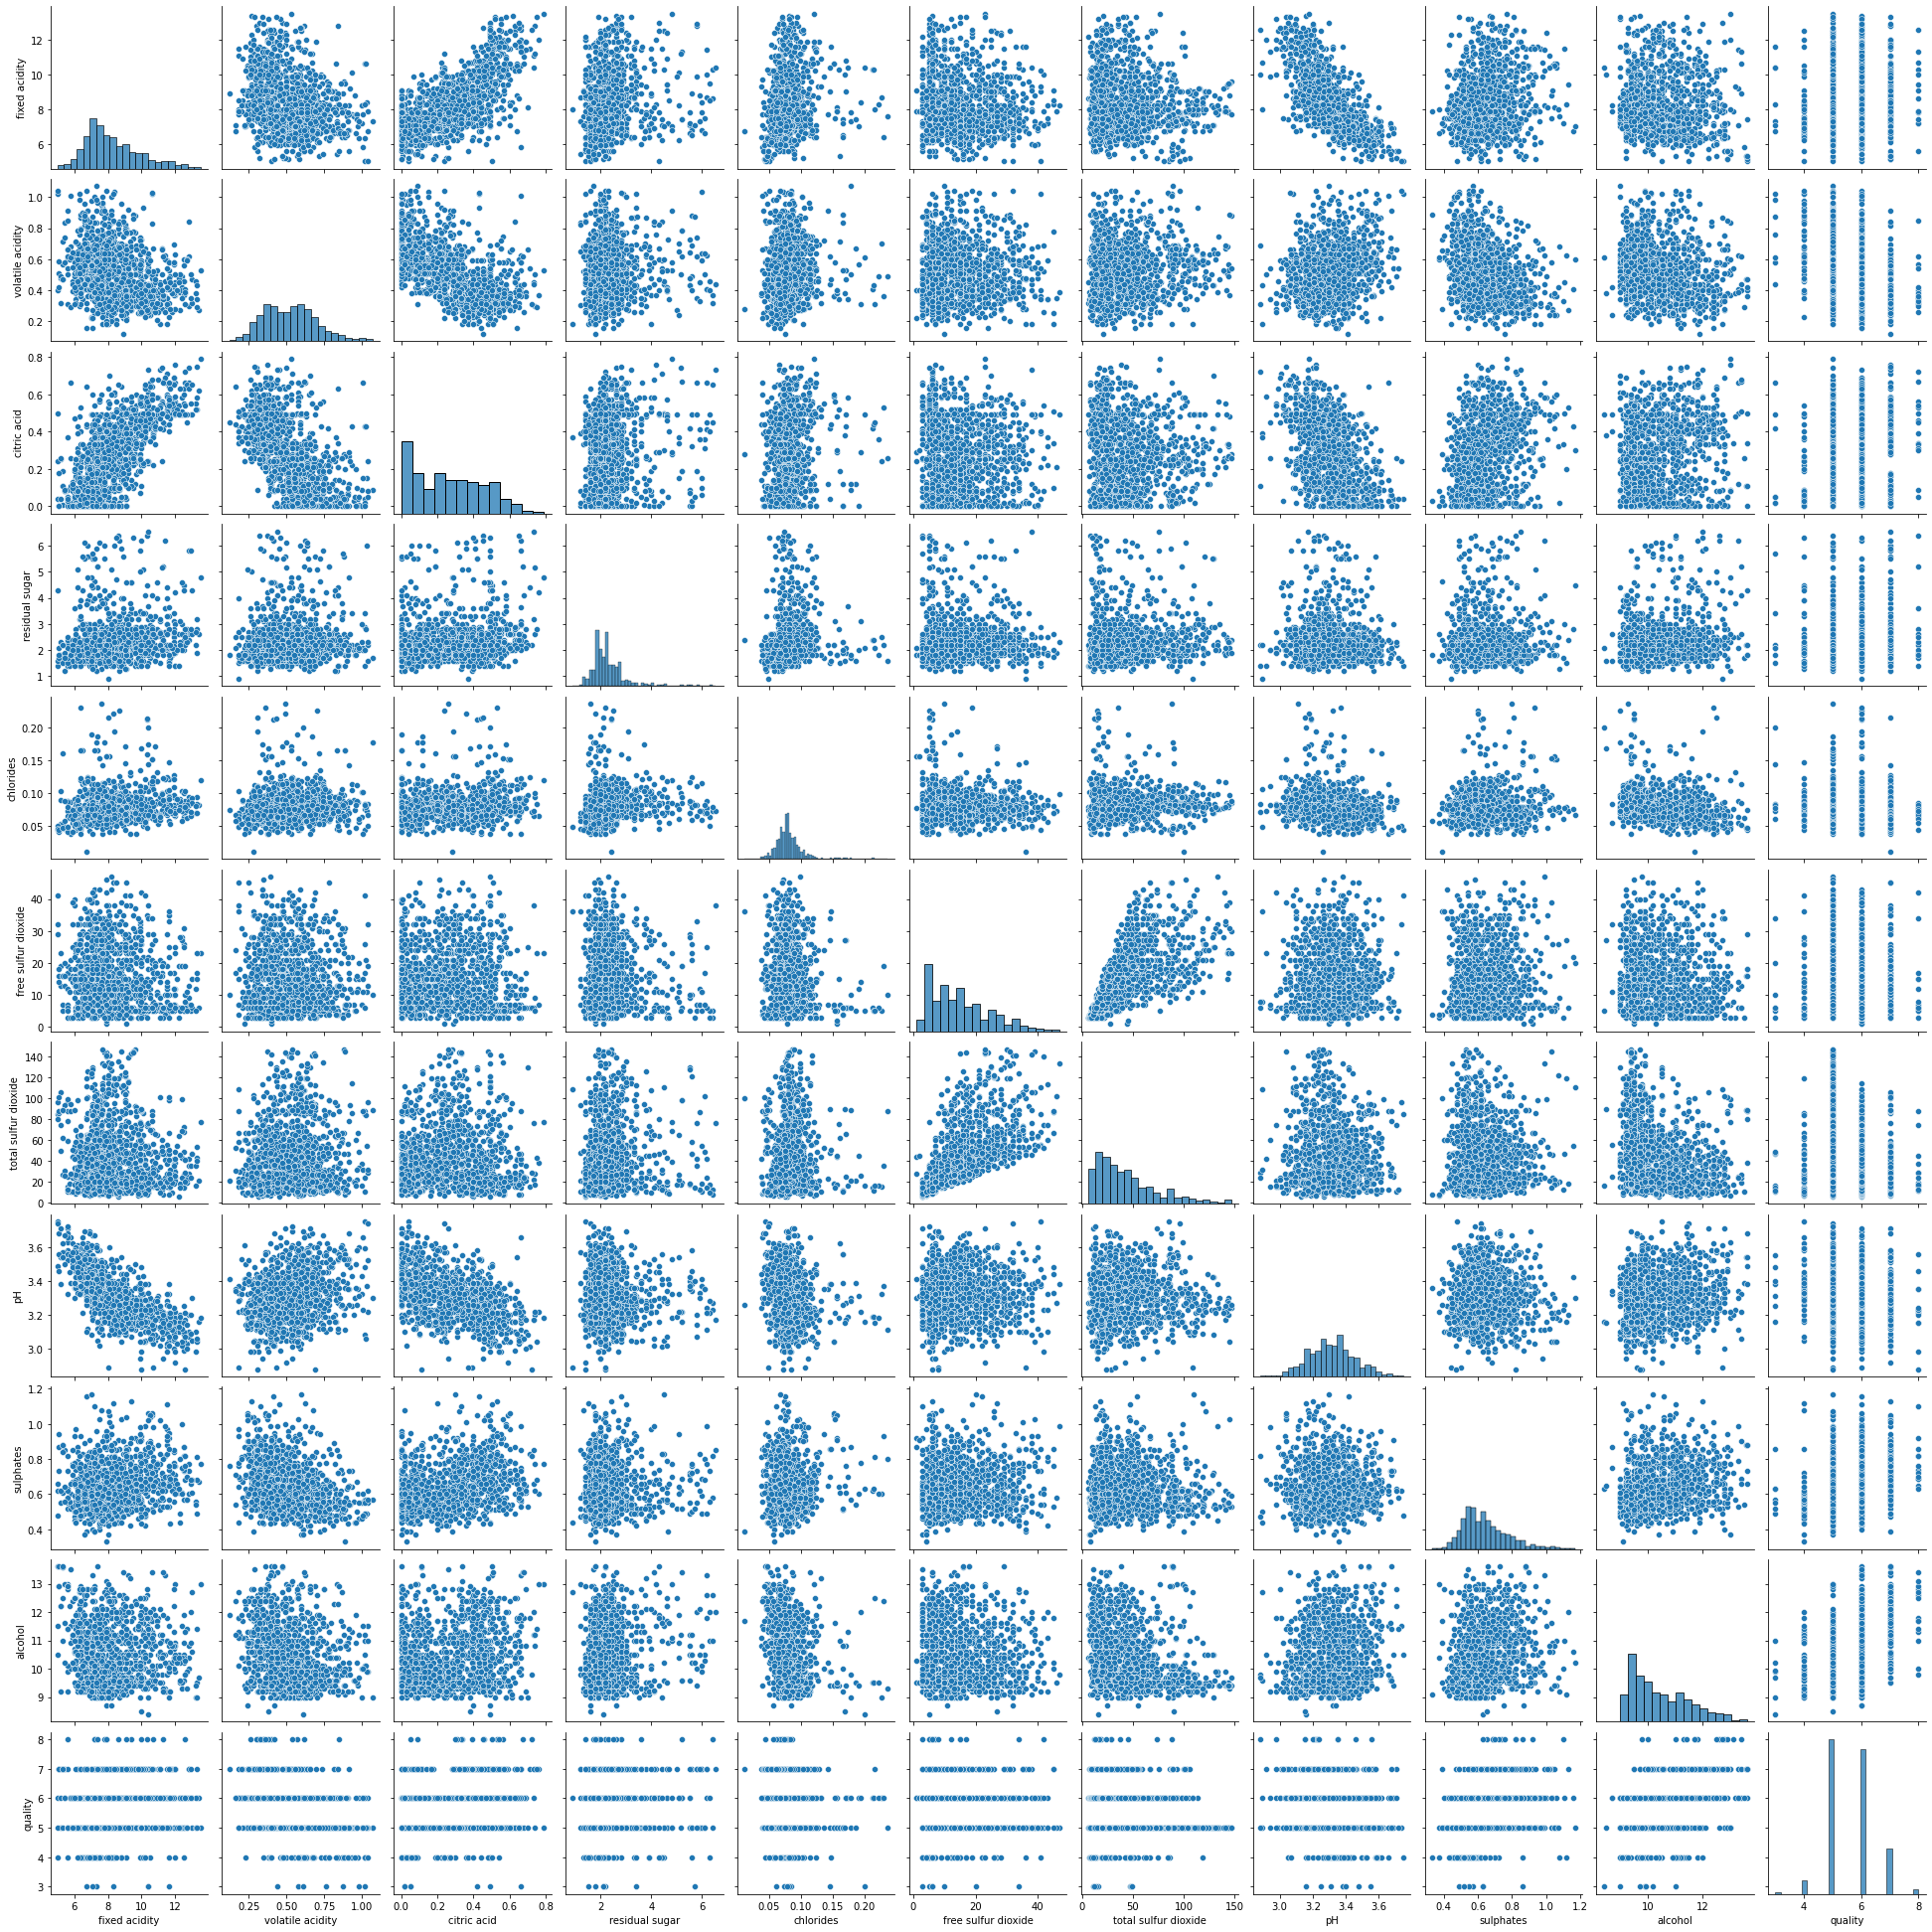

In [9]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
sns.pairplot(data = df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

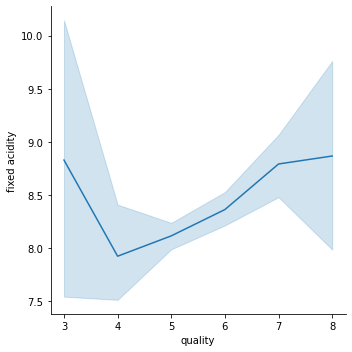

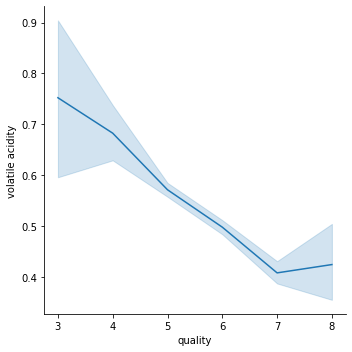

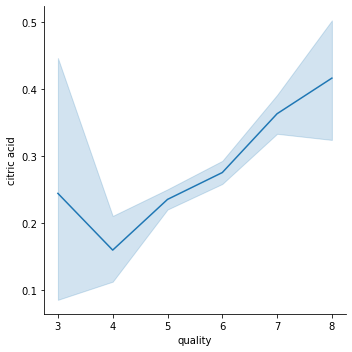

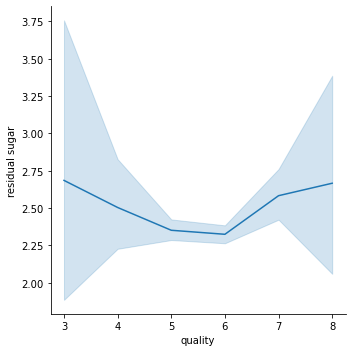

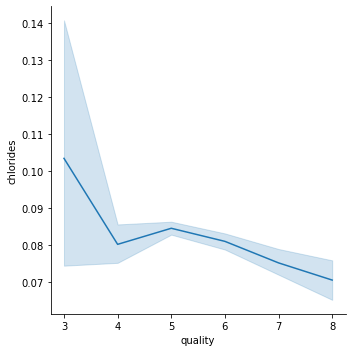

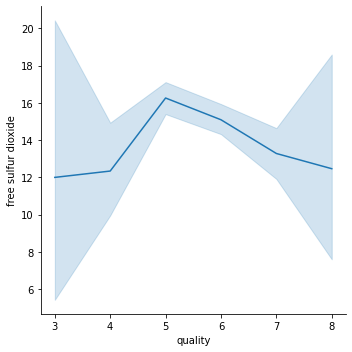

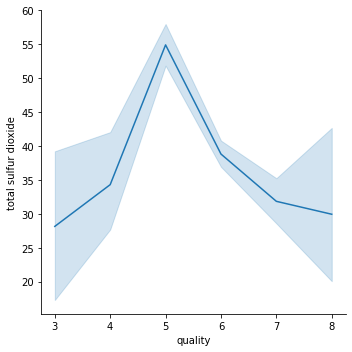

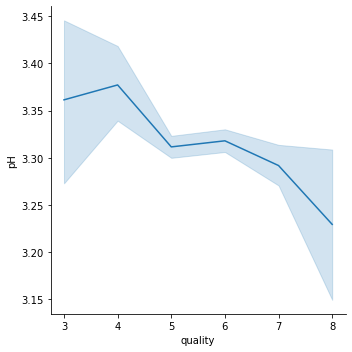

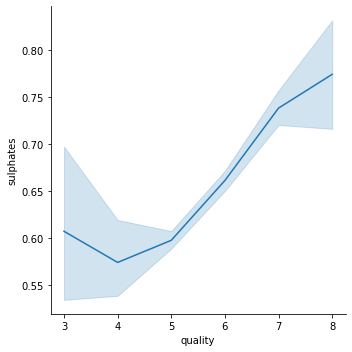

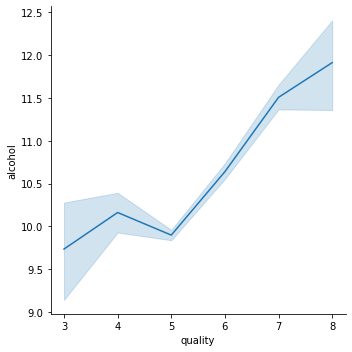

In [12]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
for feature in all_features:
    sns.relplot(data = df, y = feature, x = 'quality', kind = 'line', height = 5, aspect = 1)

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [13]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity','volatile acidity','citric acid','chlorides','sulphates']

In [14]:
# Define your X and y variables
X = df[selected_features].values

target = ['quality']
# 
y = df[target].values

In [15]:
# 3. Split our data into a training set and a testing set.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [16]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()

In [17]:
# 2. Use our training data to fit aka train our model.
model.fit(X_train,y_train)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [18]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)
y_pred

array([[5.27435658],
       [5.64144459],
       [4.91073399],
       [5.60924939],
       [5.48671923],
       [5.48573108],
       [6.08304951],
       [5.22433909],
       [6.82250004],
       [5.43053453],
       [6.02840845],
       [6.20456534],
       [6.26116651],
       [5.96865761],
       [5.19781467],
       [5.61006334],
       [5.59693623],
       [6.01431339],
       [5.79883092],
       [5.2492159 ],
       [5.85172186],
       [5.49233117],
       [5.7023952 ],
       [5.79637621],
       [6.27822546],
       [5.20226935],
       [5.93265884],
       [5.17600648],
       [5.72501288],
       [6.33774182],
       [6.4301768 ],
       [6.03269129],
       [5.9951675 ],
       [5.93997083],
       [5.24263268],
       [6.14461705],
       [5.20776492],
       [5.51848143],
       [6.49681763],
       [6.7418932 ],
       [5.69863657],
       [5.43545849],
       [6.11547241],
       [6.0397335 ],
       [5.7582925 ],
       [5.33408377],
       [5.55392824],
       [5.604

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [19]:
# 2. Calculate R-Squared and Mean Absolute Error socres

# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test,y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.20505281755137983
Mean Absolute Error: 0.6413534216563125


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [ ]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME


___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [20]:
# Do complete Random Forest Regression model here...
all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

target = ['quality']

X = df[all_features].values
y = df[target].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

model = RandomForestRegressor(random_state=1)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred

C:\Users\diallo\AppData\Local\Temp/ipykernel_10688/4256735968.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


array([5.41, 5.91, 5.16, 5.55, 5.16, 5.44, 6.77, 5.3 , 6.09, 5.65, 6.46,
       6.15, 6.34, 6.02, 5.04, 5.65, 5.46, 5.51, 5.52, 5.09, 5.81, 5.68,
       5.41, 6.12, 6.06, 5.13, 5.69, 4.88, 5.28, 6.68, 6.8 , 6.42, 6.65,
       6.77, 5.09, 5.51, 5.38, 6.03, 6.94, 6.36, 5.21, 5.45, 6.71, 5.3 ,
       5.51, 5.47, 5.56, 5.42, 5.95, 6.52, 5.22, 5.47, 4.82, 5.1 , 5.1 ,
       6.39, 6.32, 5.3 , 5.88, 6.45, 5.07, 5.27, 5.24, 6.2 , 5.22, 5.26,
       5.99, 5.57, 5.55, 6.52, 5.23, 5.59, 6.41, 4.8 , 5.3 , 5.71, 5.51,
       5.67, 5.86, 5.88, 5.34, 5.5 , 5.93, 6.2 , 6.62, 5.31, 6.26, 5.69,
       5.17, 5.7 , 5.08, 5.07, 5.96, 5.35, 5.16, 5.27, 5.99, 6.78, 6.34,
       5.54, 6.33, 5.53, 5.96, 6.  , 5.01, 6.1 , 6.16, 6.01, 5.45, 5.2 ,
       6.26, 5.51, 5.11, 6.33, 5.02, 5.27, 5.65, 5.62, 5.52, 6.3 , 5.43,
       6.4 , 5.78, 5.05, 5.09, 6.63, 6.22, 5.94, 5.47, 5.21, 5.54, 5.09,
       5.11, 5.57, 5.41, 5.12, 5.75, 5.23, 5.3 , 6.03, 5.66, 5.59, 5.09,
       5.52, 5.11, 5.29, 6.54, 5.84, 6.41, 6.68, 5.

In [ ]:
# 1. Which model proved to have better scores.


print('Your answer here')

In [ ]:
# 2. Why do you think that is...?


print('Your answer here')

# Awesome Extra Credit, I highly suggest you do this.

Follow along with this [kaggle entry](https://www.kaggle.com/code/goyalshalini93/car-price-prediction-linear-regression-rfe/notebook) about doing all sorts of trick with regression to predict car prices.  There is data in the data folder called `car_prices_clean.csv` that did their preprocess stuff.  Their origianl data file is also in there as `car_prices.csv`.

They do some strange stuff in this tutorial.  Any questions you have we will answer next week during HW review. 


In [ ]:
df = pd.read_csv('data/car_prices_clean.csv')